In [2]:
import ROOT
import numpy as np
from utils.agc_sample import AGC_Sample
from utils.rebinning_tool import RebinningTool
from utils.extra import MuteTool
from utils.drawer import Visualization, DrawModel

In [3]:
MuteTool() # Mute all the messages from minimizer

In [4]:
rebinning_tool = RebinningTool() # Rebinning as extra step (was discussed with Jonas)
rebinning_tool.set_xmin(110)
rebinning_tool.set_rebin(2)
rebinning_tool.set_input_path("data/histograms.root")
rebinning_tool.set_output_path("data/temp_histos.root") # if you dont specify this -> overwrite (?)
rebinning_tool.apply_rebinning()

In [5]:
file = ROOT.TFile("data/HistFactoryExtra.root", "RECREATE") # should be hidden. Cleaning the file
file.Close() # create separate file for each file -> two much files

input_file = "data/temp_histos.root" # input file for futher defined histograms

In [6]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

In [7]:
channel = ROOT.RooStats.HistFactory.Channel("channel_4j1b_CR")
channel.SetData("4j1b_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "4j1b_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "4j1b_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "4j1b_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "4j1b_ttbar_scaleup",        histoname_down = "4j1b_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j1b_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j1b_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j1b_ttbar_btag_var_0_up",  histoname_down = "4j1b_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j1b_ttbar_btag_var_1_up",  histoname_down = "4j1b_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j1b_ttbar_btag_var_2_up",  histoname_down = "4j1b_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j1b_ttbar_btag_var_3_up",  histoname_down = "4j1b_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "4j1b_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "4j1b_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "4j1b_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "4j1b_wjets_btag_var_0_up",  histoname_down = "4j1b_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "4j1b_wjets_btag_var_1_up",  histoname_down = "4j1b_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "4j1b_wjets_btag_var_2_up",  histoname_down = "4j1b_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "4j1b_wjets_btag_var_3_up",  histoname_down = "4j1b_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "4j1b_wjets_scale_var_up",   histoname_down = "4j1b_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "4j1b_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j1b_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j1b_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j1b_single_top_s_chan_btag_var_0_up",  histoname_down = "4j1b_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j1b_single_top_s_chan_btag_var_1_up",  histoname_down = "4j1b_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j1b_single_top_s_chan_btag_var_2_up",  histoname_down = "4j1b_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j1b_single_top_s_chan_btag_var_3_up",  histoname_down = "4j1b_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "4j1b_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j1b_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j1b_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j1b_single_top_t_chan_btag_var_0_up",  histoname_down = "4j1b_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j1b_single_top_t_chan_btag_var_1_up",  histoname_down = "4j1b_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j1b_single_top_t_chan_btag_var_2_up",  histoname_down = "4j1b_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j1b_single_top_t_chan_btag_var_3_up",  histoname_down = "4j1b_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "4j1b_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j1b_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "4j1b_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j1b_single_top_tW_btag_var_0_up",      histoname_down = "4j1b_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j1b_single_top_tW_btag_var_1_up",      histoname_down = "4j1b_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j1b_single_top_tW_btag_var_2_up",      histoname_down = "4j1b_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j1b_single_top_tW_btag_var_3_up",      histoname_down = "4j1b_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

channel_2b = ROOT.RooStats.HistFactory.Channel("channel_4j2b_SR")
channel_2b.SetData("4j2b_pseudodata", input_file)
channel_2b.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "4j2b_ttbar", input_file)
ttbar.AddOverallSys(lumi_systematics)
ttbar.SetSystematicsInputFile(input_file)
ttbar.ActivateStatError()
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "4j2b_ttbar_ME_var"                                                          )
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "4j2b_ttbar_PS_var"                                                          )
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "4j2b_ttbar_scaleup",        histoname_down = "4j2b_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j2b_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j2b_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j2b_ttbar_btag_var_0_up",  histoname_down = "4j2b_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j2b_ttbar_btag_var_1_up",  histoname_down = "4j2b_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j2b_ttbar_btag_var_2_up",  histoname_down = "4j2b_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j2b_ttbar_btag_var_3_up",  histoname_down = "4j2b_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel_2b.AddSample(ttbar)

wjets = AGC_Sample("wjets", "4j2b_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "4j2b_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "4j2b_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "4j2b_wjets_btag_var_0_up",  histoname_down = "4j2b_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "4j2b_wjets_btag_var_1_up",  histoname_down = "4j2b_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "4j2b_wjets_btag_var_2_up",  histoname_down = "4j2b_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "4j2b_wjets_btag_var_3_up",  histoname_down = "4j2b_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "4j2b_wjets_scale_var_up",   histoname_down = "4j2b_wjets_scale_var_down"    )
channel_2b.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "4j2b_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j2b_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j2b_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j2b_single_top_s_chan_btag_var_0_up",  histoname_down = "4j2b_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j2b_single_top_s_chan_btag_var_1_up",  histoname_down = "4j2b_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j2b_single_top_s_chan_btag_var_2_up",  histoname_down = "4j2b_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j2b_single_top_s_chan_btag_var_3_up",  histoname_down = "4j2b_single_top_s_chan_btag_var_3_down"   )
channel_2b.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "4j2b_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j2b_single_top_t_chan_pt_scale_up"                                                                 )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j2b_single_top_t_chan_pt_res_up"                                                                   )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j2b_single_top_t_chan_btag_var_0_up",  histoname_down = "4j2b_single_top_t_chan_btag_var_0_down"   )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j2b_single_top_t_chan_btag_var_1_up",  histoname_down = "4j2b_single_top_t_chan_btag_var_1_down"   )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j2b_single_top_t_chan_btag_var_2_up",  histoname_down = "4j2b_single_top_t_chan_btag_var_2_down"   )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j2b_single_top_t_chan_btag_var_3_up",  histoname_down = "4j2b_single_top_t_chan_btag_var_3_down"   )

channel_2b.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "4j2b_single_top_tW", input_file)
single_top_tW.ActivateStatError()
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j2b_single_top_tW_pt_scale_up"                                                             )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j2b_single_top_tW_pt_res_up"                                                               )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j2b_single_top_tW_btag_var_0_up",  histoname_down = "4j2b_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j2b_single_top_tW_btag_var_1_up",  histoname_down = "4j2b_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j2b_single_top_tW_btag_var_2_up",  histoname_down = "4j2b_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j2b_single_top_tW_btag_var_3_up",  histoname_down = "4j2b_single_top_tW_btag_var_3_down"   )

channel_2b.AddSample(single_top_tW)
meas.AddChannel(channel_2b)

In [8]:
meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)

[#2] PROGRESS:HistFactory -- Getting histogram data/temp_histos.root:/4j1b_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/temp_histos.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/temp_histos.root:/4j1b_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/4j1b_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/4j1b_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/4j1b_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/4j1b_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/4j1b_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/4j1b_ttbar_tt_scale_v

In [9]:
ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

# Retrieve the ModelConfig
modelConfig = ws.obj("ModelConfig")

# Extract the PDF and global observables
pdf = modelConfig.GetPdf()
globalObservables = ROOT.RooArgSet(modelConfig.GetGlobalObservables())

# Perform the fit
result = pdf.fitTo(ws.data("obsData"), ROOT.RooFit.Save(), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.GlobalObservables(globalObservables))

[#2] INFO:HistFactory -- Making Model and Measurements (Fast) for measurement: meas
[#2] INFO:HistFactory -- using lumi = 1 and lumiError = 0 including bins between 0 and 1
[#2] INFO:HistFactory -- fixing the following parameters:
[#2] INFO:HistFactory -- Creating the output file: _meas.root
[#2] INFO:HistFactory -- Creating the HistoToWorkspaceFactoryFast factory
[#2] INFO:HistFactory -- Setting preprocess functions
[#2] PROGRESS:HistFactory -- Starting to process channel: channel_4j1b_CR
[#2] PROGRESS:HistFactory -- 
-----------------------------------------
	Starting to process 'channel_4j1b_CR' channel with 1 observables
-----------------------------------------

[#2] INFO:HistFactory -- making normFactor: ttbar_norm
[#2] INFO:HistFactory -- processing hist 4j1b_ttbartemp_rebin_clone
[#2] INFO:HistFactory -- Sample: ttbar to be included in Stat Error for channel channel_4j1b_CR
[#2] INFO:HistFactory -- Making Statistical Uncertainty Hist for  Channel: channel_4j1b_CR Sample: ttbar


In [10]:
# Print the fit result
result.Print()


  RooFitResult: minimized FCN value: 56216.2, estimated distance to minimum: 0.000164757
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
            alpha_Lumi   -2.4173e-01 +/-  9.77e-01
    alpha_ME_variation    4.8219e-01 +/-  1.25e-01
    alpha_PS_variation    4.1771e-01 +/-  1.43e-01
      alpha_b_tag_NP_1   -6.3189e-02 +/-  5.20e-01
      alpha_b_tag_NP_2    1.9984e-01 +/-  7.82e-01
      alpha_b_tag_NP_3   -1.2123e-01 +/-  9.06e-01
      alpha_b_tag_NP_4   -2.2936e-01 +/-  9.55e-01
  alpha_jet_energy_res    6.0284e-02 +/-  3.61e-01
  alpha_jet_energy_scale   -1.1904e-01 +/-  1.76e-01
    alpha_tt_scale_var    2.0981e-01 +/-  4.01e-01
  alpha_w_plus_jets_scale_var   -1.3056e-01 +/-  9.87e-01
  gamma_stat_channel_4j1b_CR_bin_0    1.0112e+00 +/-  9.35e-02
  gamma_stat_channel_4j1b_CR_bin_1    9.8703e-01 +/- 

Info in <TCanvas::Print>: png file picture.png has been created
Info in <TCanvas::Print>: png file correlation_matrix.png has been created


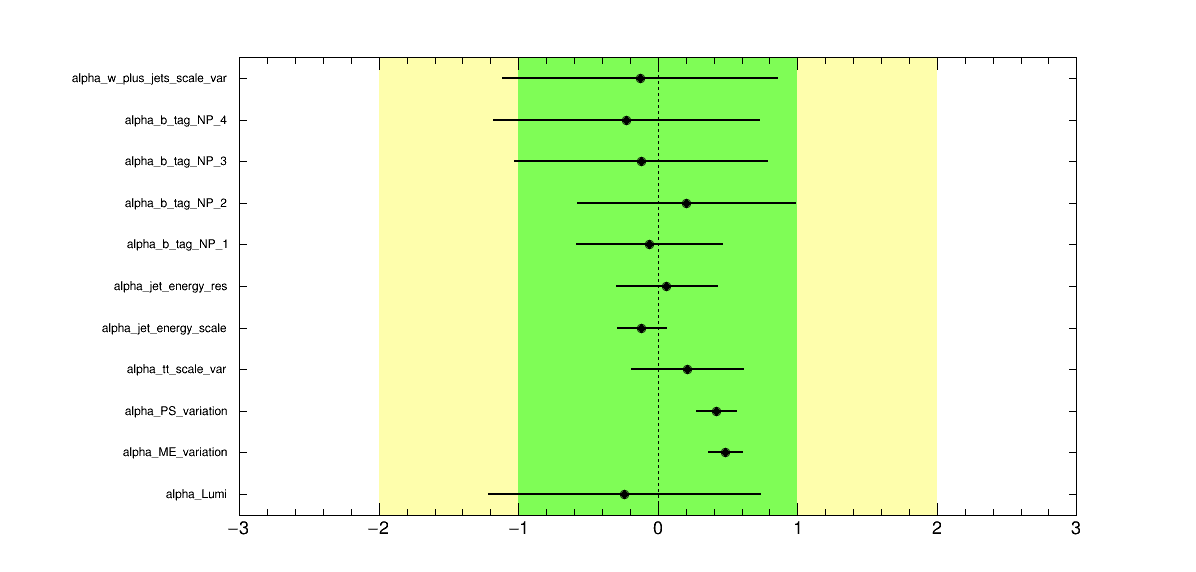

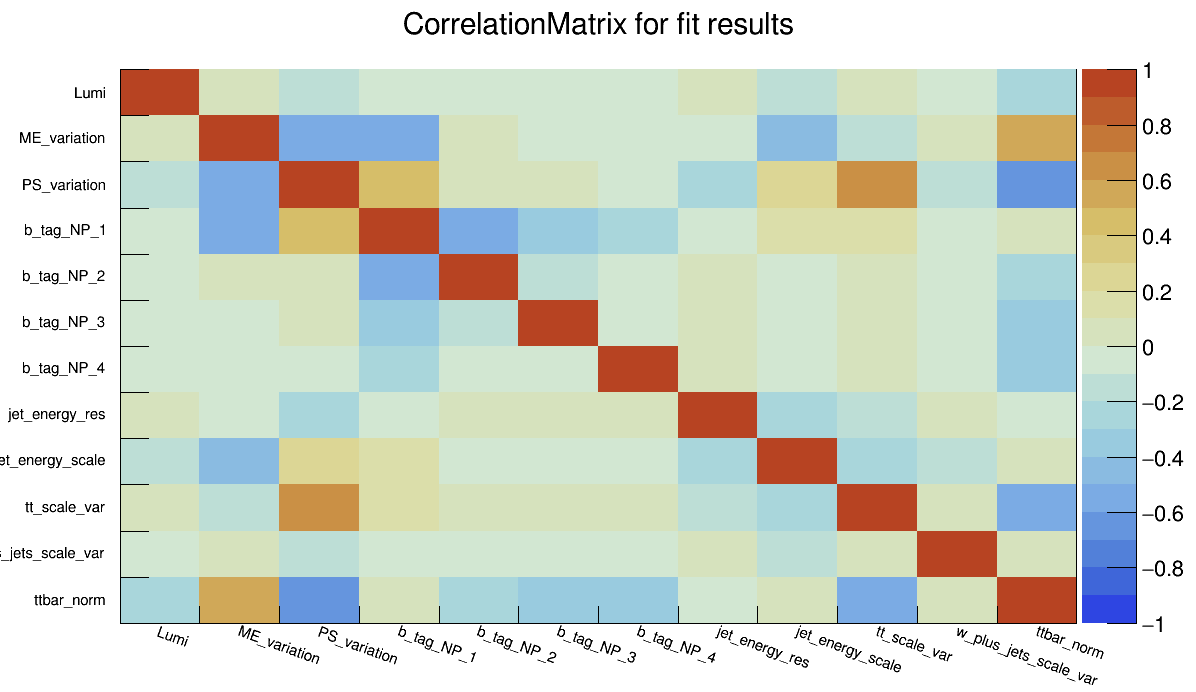

In [11]:
vis = Visualization()
vis.CreateAndSaveResultsPicture("picture.png", ws) # Parameters fit result

vis.DrawCorrelationMatrix("correlation_matrix.png", result) # Correlation matrix

Info in <TCanvas::Print>: png file channel_4j1b_CR_histo.png has been created
Info in <TCanvas::Print>: png file channel_4j2b_SR_histo.png has been created


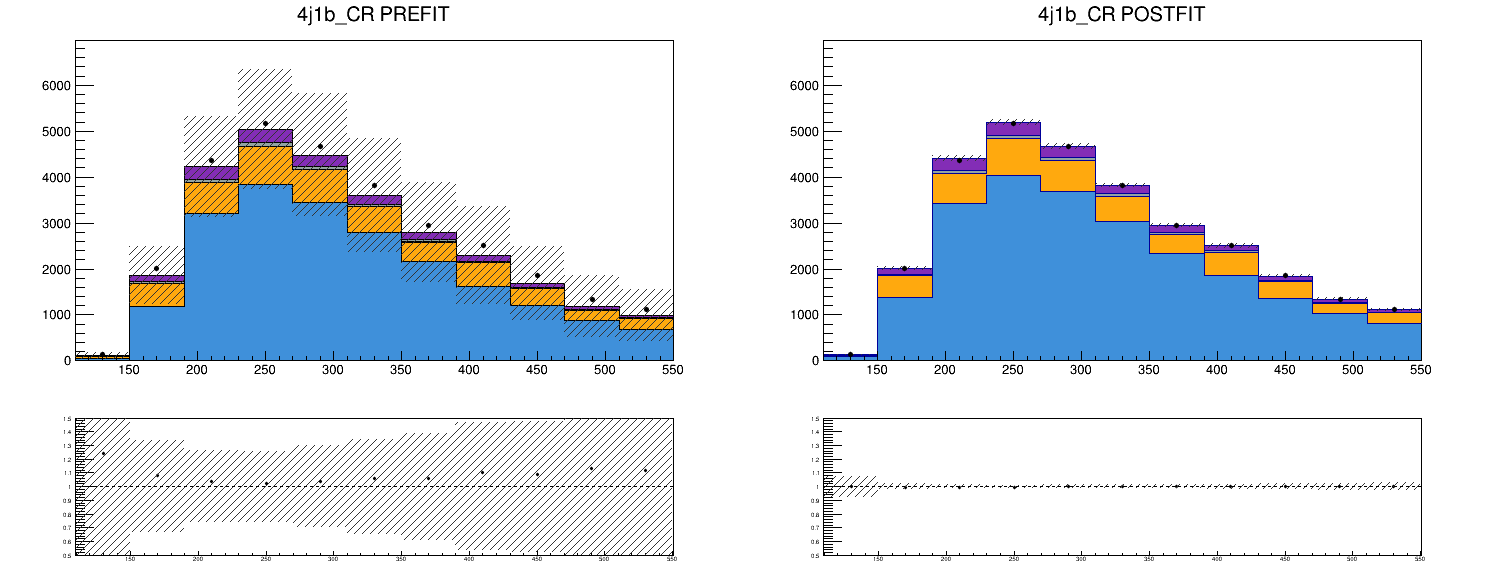

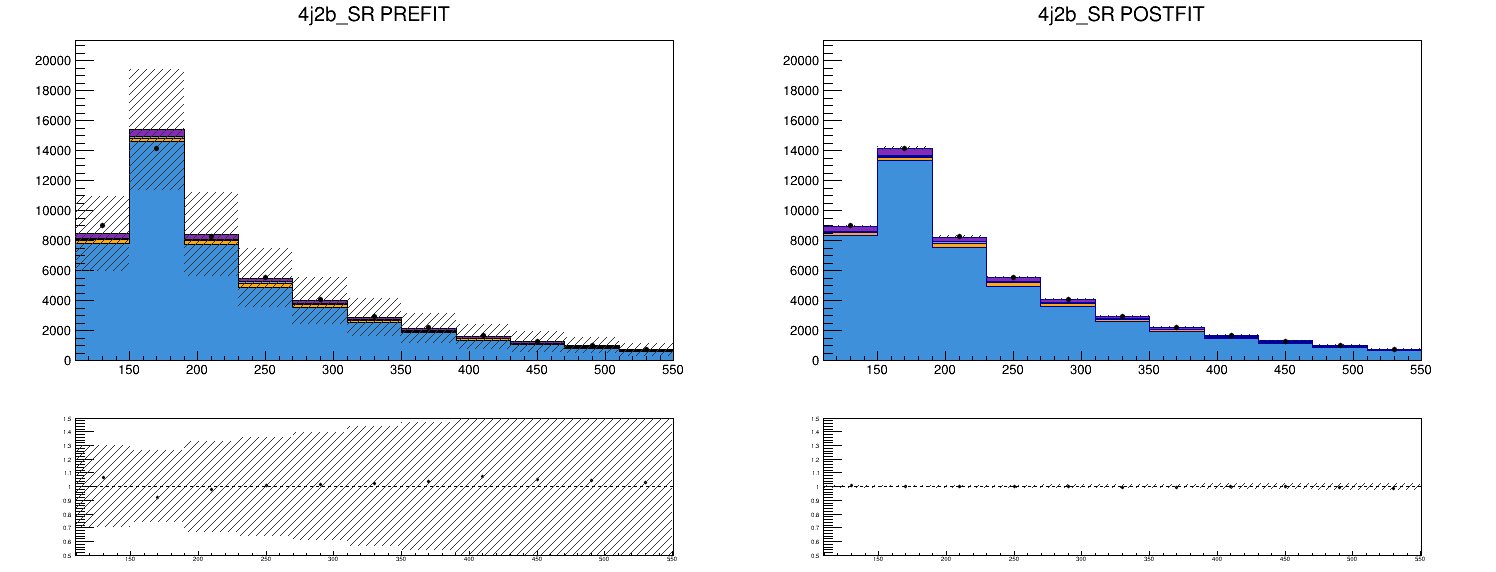

In [12]:
md = DrawModel(meas, ws)
md.Draw(result)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_leptonbtoplep_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_leptonbtoplep_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram d

Info in <TCanvas::Print>: png file channel_deltar_leptonbtoplep_histo.png has been created


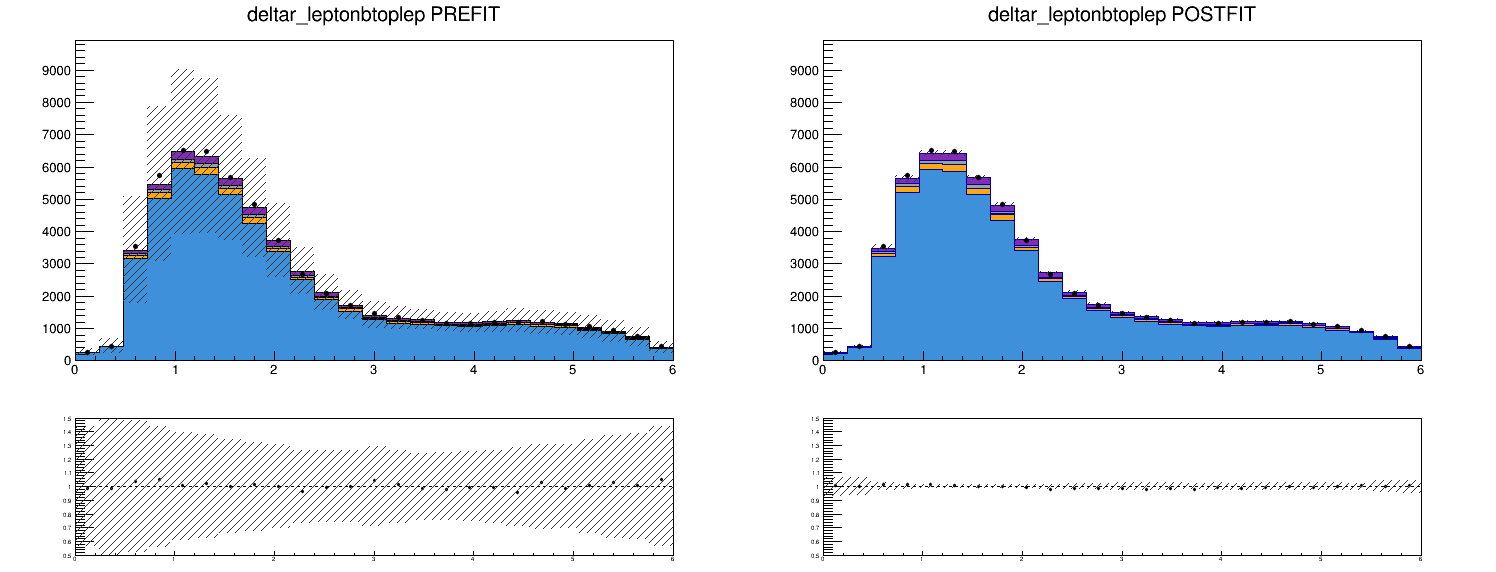

In [13]:
#postfit validation


input_file = "data/histograms_ml.root" # input file for futher defined histograms

meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

channel = ROOT.RooStats.HistFactory.Channel("channel_deltar_leptonbtoplep")
channel.SetData("deltar_leptonbtoplep_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "deltar_leptonbtoplep_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "deltar_leptonbtoplep_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "deltar_leptonbtoplep_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "deltar_leptonbtoplep_ttbar_scaleup",        histoname_down = "deltar_leptonbtoplep_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_leptonbtoplep_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_leptonbtoplep_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_leptonbtoplep_ttbar_btag_var_0_up",  histoname_down = "deltar_leptonbtoplep_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_leptonbtoplep_ttbar_btag_var_1_up",  histoname_down = "deltar_leptonbtoplep_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_leptonbtoplep_ttbar_btag_var_2_up",  histoname_down = "deltar_leptonbtoplep_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_leptonbtoplep_ttbar_btag_var_3_up",  histoname_down = "deltar_leptonbtoplep_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "deltar_leptonbtoplep_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "deltar_leptonbtoplep_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "deltar_leptonbtoplep_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "deltar_leptonbtoplep_wjets_btag_var_0_up",  histoname_down = "deltar_leptonbtoplep_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "deltar_leptonbtoplep_wjets_btag_var_1_up",  histoname_down = "deltar_leptonbtoplep_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "deltar_leptonbtoplep_wjets_btag_var_2_up",  histoname_down = "deltar_leptonbtoplep_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "deltar_leptonbtoplep_wjets_btag_var_3_up",  histoname_down = "deltar_leptonbtoplep_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "deltar_leptonbtoplep_wjets_scale_var_up",   histoname_down = "deltar_leptonbtoplep_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "deltar_leptonbtoplep_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_leptonbtoplep_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_leptonbtoplep_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_leptonbtoplep_single_top_s_chan_btag_var_0_up",  histoname_down = "deltar_leptonbtoplep_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_leptonbtoplep_single_top_s_chan_btag_var_1_up",  histoname_down = "deltar_leptonbtoplep_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_leptonbtoplep_single_top_s_chan_btag_var_2_up",  histoname_down = "deltar_leptonbtoplep_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_leptonbtoplep_single_top_s_chan_btag_var_3_up",  histoname_down = "deltar_leptonbtoplep_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "deltar_leptonbtoplep_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_leptonbtoplep_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "deltar_leptonbtoplep_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_leptonbtoplep_single_top_t_chan_btag_var_0_up",  histoname_down = "deltar_leptonbtoplep_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_leptonbtoplep_single_top_t_chan_btag_var_1_up",  histoname_down = "deltar_leptonbtoplep_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_leptonbtoplep_single_top_t_chan_btag_var_2_up",  histoname_down = "deltar_leptonbtoplep_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_leptonbtoplep_single_top_t_chan_btag_var_3_up",  histoname_down = "deltar_leptonbtoplep_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "deltar_leptonbtoplep_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "deltar_leptonbtoplep_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "deltar_leptonbtoplep_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "deltar_leptonbtoplep_single_top_tW_btag_var_0_up",      histoname_down = "deltar_leptonbtoplep_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "deltar_leptonbtoplep_single_top_tW_btag_var_1_up",      histoname_down = "deltar_leptonbtoplep_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "deltar_leptonbtoplep_single_top_tW_btag_var_2_up",      histoname_down = "deltar_leptonbtoplep_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "deltar_leptonbtoplep_single_top_tW_btag_var_3_up",      histoname_down = "deltar_leptonbtoplep_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)


ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

md = DrawModel(meas, ws)
md.Draw(result, no_fit = True)

In [14]:
#save fit results to ROOT file

file = ROOT.TFile("fitResults.root", "RECREATE")

result.Write("fitResult")

file.Close()